In [ ]:
# This makes another plot of the Fig. 11 in the Altair paper, which was 
# criticized by a reviewer

# Created 2021 Aug. 12 by E.S.

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy.ndimage

%matplotlib inline

In [2]:
stem = "./data/redo_paper_plot"

In [3]:
hdul_w_planet = fits.open(stem + "/w_planet.fits")
hdul_wo_planet = fits.open(stem + "/wo_planet.fits")
hdul_comparison = fits.open(stem + "/comparison_strip_D_2_of_4.fits")

hdul_strip_0_of_4 = fits.open(stem + "/3468622_strip_0_of_4.fits")
pa_strip_0 = 50.32 # position angle
hdul_strip_1_of_4 = fits.open(stem + "/3468636_strip_1_of_4.fits")
pa_strip_1 = 70.782 # position angle
hdul_strip_2_of_4 = fits.open(stem + "/3473238_strip_2_of_4.fits")
pa_strip_2 = 76.57 # position angle
hdul_strip_3_of_4 = fits.open(stem + "/3470630_strip_3_of_4.fits")
pa_strip_3 = 83.37 # position angle
hdul_strip_4_of_4 = fits.open(stem + "/3470639_strip_4_of_4.fits")
pa_strip_4 = 90.04 # position angle

In [4]:
# replace nans on edges with zeros, then rotate so that they are horizontal, with the 'planet' on the left

strip_0_of_4_wo_planet_replaced_nans = np.nan_to_num(hdul_wo_planet[0].data, copy=True)
strip_0_of_4_wo_planet_rotated = scipy.ndimage.rotate(strip_0_of_4_wo_planet_replaced_nans, pa_strip_0, reshape=False)

strip_0_of_4_w_planet_replaced_nans = np.nan_to_num(hdul_strip_0_of_4[0].data, copy=True)
strip_0_of_4_w_planet_rotated = scipy.ndimage.rotate(strip_0_of_4_w_planet_replaced_nans, pa_strip_0, reshape=False)

strip_1_of_4_replaced_nans = np.nan_to_num(hdul_strip_1_of_4[0].data, copy=True)
strip_1_of_4_rotated = scipy.ndimage.rotate(strip_1_of_4_replaced_nans, pa_strip_1, reshape=False)
strip_2_of_4_replaced_nans = np.nan_to_num(hdul_strip_2_of_4[0].data, copy=True)
strip_2_of_4_rotated = scipy.ndimage.rotate(strip_2_of_4_replaced_nans, pa_strip_2, reshape=False)
strip_3_of_4_replaced_nans = np.nan_to_num(hdul_strip_3_of_4[0].data, copy=True)
strip_3_of_4_rotated = scipy.ndimage.rotate(strip_3_of_4_replaced_nans, pa_strip_3, reshape=False)
strip_4_of_4_replaced_nans = np.nan_to_num(hdul_strip_4_of_4[0].data, copy=True)
strip_4_of_4_rotated = scipy.ndimage.rotate(strip_4_of_4_replaced_nans, pa_strip_4, reshape=False)

In [5]:
# resids of the same strip, with and without a planet
resids_self = np.subtract(strip_0_of_4_w_planet_rotated,strip_0_of_4_wo_planet_rotated)

# residuals with the other strips
resids_1_with_0 = np.subtract(strip_0_of_4_w_planet_rotated,strip_1_of_4_rotated)
resids_2_with_0 = np.subtract(strip_0_of_4_w_planet_rotated,strip_2_of_4_rotated)
resids_3_with_0 = np.subtract(strip_0_of_4_w_planet_rotated,strip_3_of_4_rotated)
resids_4_with_0 = np.subtract(strip_0_of_4_w_planet_rotated,strip_4_of_4_rotated)

<ipython-input-118-3fce33feac43>:82: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace=-0.2,


<Figure size 432x288 with 0 Axes>

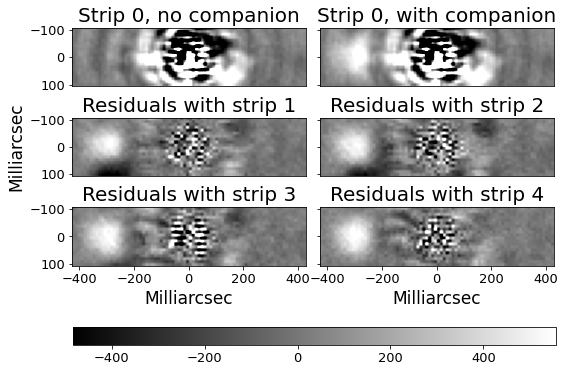

In [118]:
# all together now: plot ver. 2

# row 1: strip 0 w/o planet    strip 0 w planet
# row 2: strip 1 of 4          strip 2 of 4
# row 3: strip 3 of 4          strip 4 of 4

low_pass_y = 203-10
high_pass_y = 203+10
low_pass_x = 203-40
high_pass_x = 203+40

plt.clf()
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 5), sharey=True, 
                        constrained_layout=True, 
                        gridspec_kw={"height_ratios":[1, 1, 1, 0.05]})

# row 1
im00 = axs[0,0].imshow(strip_0_of_4_wo_planet_rotated[low_pass_y:high_pass_y,low_pass_x:high_pass_x], 
              origin="upper", extent=[-428.0,428.0,107.0,-107.0], cmap="gray", aspect='equal', vmin=-80, vmax=90)
im01 = axs[0,1].imshow(strip_0_of_4_w_planet_rotated[low_pass_y:high_pass_y,low_pass_x:high_pass_x], 
              origin="upper", extent=[-428.0,428.0,107.0,-107.0], cmap="gray", aspect='equal', vmin=-80, vmax=90)

# row 2
im10 = axs[1,0].imshow(resids_1_with_0[low_pass_y:high_pass_y,low_pass_x:high_pass_x], 
              origin="upper", extent=[-428.0,428.0,107.0,-107.0], cmap="gray", aspect='equal', vmin=-80, vmax=90)
im11 = axs[1,1].imshow(resids_2_with_0[low_pass_y:high_pass_y,low_pass_x:high_pass_x], 
              origin="upper", extent=[-428.0,428.0,107.0,-107.0], cmap="gray", aspect='equal', vmin=-80, vmax=90)

# row 3
im20 = axs[2,0].imshow(resids_3_with_0[low_pass_y:high_pass_y,low_pass_x:high_pass_x], 
              origin="upper", extent=[-428.0,428.0,107.0,-107.0], cmap="gray", aspect='equal', vmin=-80, vmax=90)
im21 = axs[2,1].imshow(resids_4_with_0[low_pass_y:high_pass_y,low_pass_x:high_pass_x], 
              origin="upper", extent=[-428.0,428.0,107.0,-107.0], cmap="gray", aspect='equal', vmin=-80, vmax=90)

axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()
axs[2,0].invert_yaxis()
axs[2,1].invert_yaxis()

#axs[0,0].set_ylabel("Milliarcsec", fontsize=17)
axs[1,0].set_ylabel("Milliarcsec", fontsize=17)
#axs[2,0].set_ylabel("Milliarcsec", fontsize=17)
axs[2,0].set_xlabel("Milliarcsec", fontsize=17)
axs[2,1].set_xlabel("Milliarcsec", fontsize=17)

axs[0,0].set_title("Strip 0, no companion", fontsize=20)
axs[0,1].set_title("Strip 0, with companion", fontsize=20)
axs[1,0].set_title("Residuals with strip 1", fontsize=20)
axs[1,1].set_title("Residuals with strip 2", fontsize=20)
axs[2,0].set_title("Residuals with strip 3", fontsize=20)
axs[2,1].set_title("Residuals with strip 4", fontsize=20)
#axs[2].set_title("Residuals", fontsize=20)

axs[0,0].xaxis.set_visible(False)
axs[0,1].xaxis.set_visible(False)
axs[1,0].xaxis.set_visible(False)
axs[1,1].xaxis.set_visible(False)

axs[0,0].tick_params(axis='y', labelsize=13)
#axs[0,1].tick_params(axis='x', labelsize=13)
axs[1,0].tick_params(axis='y', labelsize=13)

axs[2,0].tick_params(axis='y', labelsize=13)
axs[2,0].tick_params(axis='x', labelsize=13)
axs[2,1].tick_params(axis='x', labelsize=13)
#fig.suptitle('Categorical Plotting')

axs[3,0].set_visible(False)
axs[3,1].set_visible(False)

# colorbar 1
#fig.subplots_adjust(left=0, bottom=1, right=0, top=1, wspace=0, hspace=0)
#im20.subplots_adjust(bottom=-3)
#fig.adjust(bottom=-3)
cbaxes1 = fig.add_axes([0.18, 0.0, 0.67, 0.05]) # left, bottom, width, height
cb1 = fig.colorbar(im0, ax=axs[:2], cax = cbaxes1, orientation="horizontal", pad=2)

cb1.ax.tick_params(labelsize=13)

plt.subplots_adjust(wspace=-0.2, 
                    hspace=0.7)


plt.savefig("junk.png", dpi=400, bbox_inches="tight")#pad_inches=1)